# Introdução

Este estudo tem como objetivo analisar o consumo de energia elétrica no Brasil ao longo dos anos.

Atividade 1: Coleta, Limpeza e Análise Exploratória de Dados (AED)


Objetivo: realizar a coleta e a preparação dos dados, garantindo a qualidade e a
integridade das informações para a análise

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
#carregando os datasets

df_consumo_energia = pd.read_csv('../data/consumo_energia_eletrica.csv', sep=',', encoding='utf-8')
df_consumo_energia.head()

,ano,mes,sigla_uf,tipo_consumo,numero_consumidores,consumo
0,2004,1,TO,Total,NaN,65876
1,2004,1,BA,Total,NaN,1444451
2,2004,1,PR,Total,NaN,1596274
3,2004,1,RS,Total,NaN,1780912
4,2004,1,GO,Total,NaN,630624


In [8]:
df_estado_regiao = pd.read_csv('../data/estado_regiao.csv', sep=';', encoding='latin1')
df_estado_regiao.head()

,id_estado,sigla,estado,regiao,pais
0,1,AC,Acre,Norte,Brasil
1,2,AL,Alagoas,Nordeste,Brasil
2,3,AP,Amapá,Norte,Brasil
3,4,AM,Amazonas,Norte,Brasil
4,5,BA,Bahia,Nordeste,Brasil


In [10]:
#verifando dados nulos no dataset energia

df_consumo_energia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39897 entries, 0 to 39896
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ano                  39897 non-null  int64  
 1   mes                  39897 non-null  int64  
 2   sigla_uf             39897 non-null  object 
 3   tipo_consumo         39897 non-null  object 
 4   numero_consumidores  26937 non-null  float64
 5   consumo              39897 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 1.8+ MB


In [11]:
# conforme instrucao será excluido todos os dados ausentes
df_consumo_energia = df_consumo_energia.dropna()
df_consumo_energia.info()


<class 'pandas.core.frame.DataFrame'>
Index: 26937 entries, 648 to 39896
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ano                  26937 non-null  int64  
 1   mes                  26937 non-null  int64  
 2   sigla_uf             26937 non-null  object 
 3   tipo_consumo         26937 non-null  object 
 4   numero_consumidores  26937 non-null  float64
 5   consumo              26937 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 1.4+ MB


In [12]:
#verifando dados nulos no dataset estado regiao
df_estado_regiao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id_estado  27 non-null     int64 
 1   sigla      27 non-null     object
 2   estado     27 non-null     object
 3   regiao     27 non-null     object
 4   pais       27 non-null     object
dtypes: int64(1), object(4)
memory usage: 1.2+ KB


In [ ]:
df_final = df_consumo_energia.merge(df_estado_regiao, how='inner', left_on='sigla_uf', right_on='sigla')
df_final.head()
#Isso fará a junção apenas das linhas onde há correspondência entre os dois DataFrames, garantindo que apenas os registros compartilhados sejam mantidos.

,ano,mes,sigla_uf,tipo_consumo,numero_consumidores,consumo,id_estado,sigla,estado,regiao,pais
0,2004,1,RN,Outros,40857.0,69617,20,RN,Rio Grande do Norte,Nordeste,Brasil
1,2004,1,SP,Outros,311650.0,937538,25,SP,São Paulo,Sudeste,Brasil
2,2004,1,MS,Outros,56881.0,67601,12,MS,Mato Grosso do Sul,Centro-Oeste,Brasil
3,2004,1,SC,Outros,226165.0,209380,24,SC,Santa Catarina,Sul,Brasil
4,2004,1,RJ,Outros,70634.0,416128,19,RJ,Rio de Janeiro,Sudeste,Brasil


In [14]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26937 entries, 0 to 26936
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ano                  26937 non-null  int64  
 1   mes                  26937 non-null  int64  
 2   sigla_uf             26937 non-null  object 
 3   tipo_consumo         26937 non-null  object 
 4   numero_consumidores  26937 non-null  float64
 5   consumo              26937 non-null  int64  
 6   id_estado            26937 non-null  int64  
 7   sigla                26937 non-null  object 
 8   estado               26937 non-null  object 
 9   regiao               26937 non-null  object 
 10  pais                 26937 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 2.3+ MB


# Analises

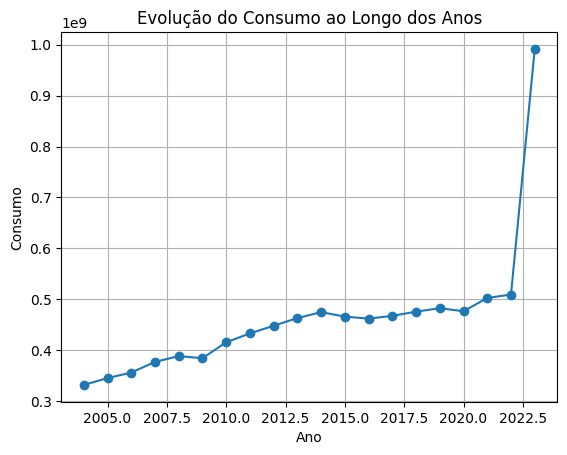

In [15]:
#1. Evolução do consumo ao longo dos anos

import matplotlib.pyplot as plt

df_final.groupby('ano')['consumo'].sum().plot(kind='line', marker='o')
plt.title('Evolução do Consumo ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Consumo')
plt.grid()
plt.show()


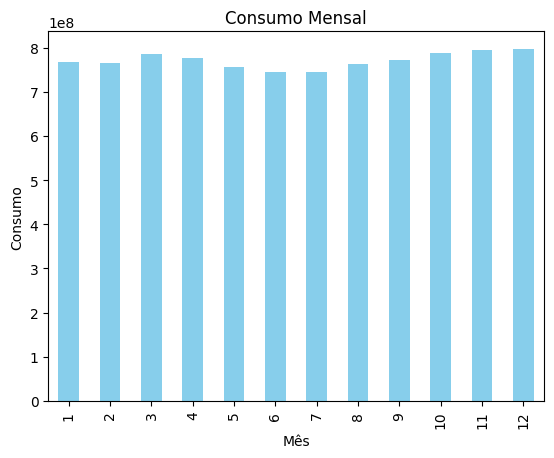

In [16]:
#2. Variação mensal do consumo
df_final.groupby('mes')['consumo'].sum().plot(kind='bar', color='skyblue')
plt.title('Consumo Mensal')
plt.xlabel('Mês')
plt.ylabel('Consumo')
plt.show()


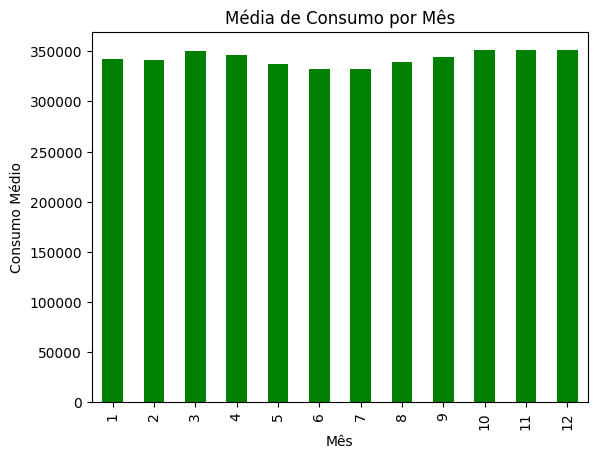

In [18]:
#3. Média de consumo por mês
df_final.groupby('mes')['consumo'].mean().plot(kind='bar', color='green')
plt.title('Média de Consumo por Mês')
plt.xlabel('Mês')
plt.ylabel('Consumo Médio')
plt.show()


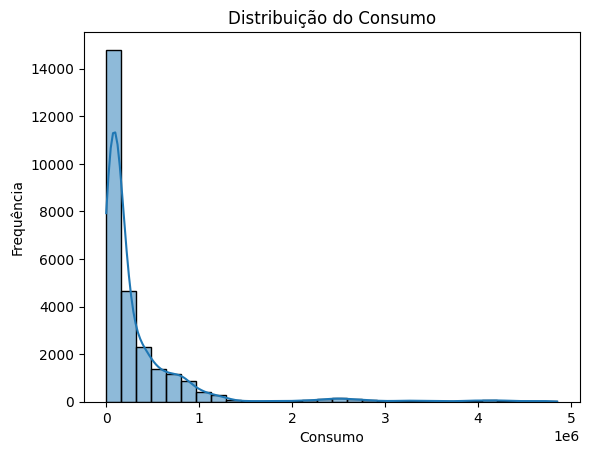

In [19]:
#4. Distribuição do consumo ao longo dos anos
import seaborn as sns

sns.histplot(df_final['consumo'], bins=30, kde=True)
plt.title('Distribuição do Consumo')
plt.xlabel('Consumo')
plt.ylabel('Frequência')
plt.show()


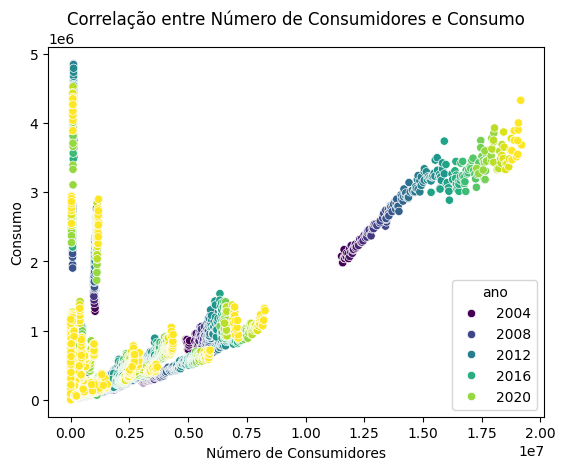

In [20]:
#5. Correlação entre número de consumidores e consumo ao longo do tempo
import seaborn as sns

sns.scatterplot(data=df_final, x='numero_consumidores', y='consumo', hue='ano', palette='viridis')
plt.title('Correlação entre Número de Consumidores e Consumo')
plt.xlabel('Número de Consumidores')
plt.ylabel('Consumo')
plt.show()


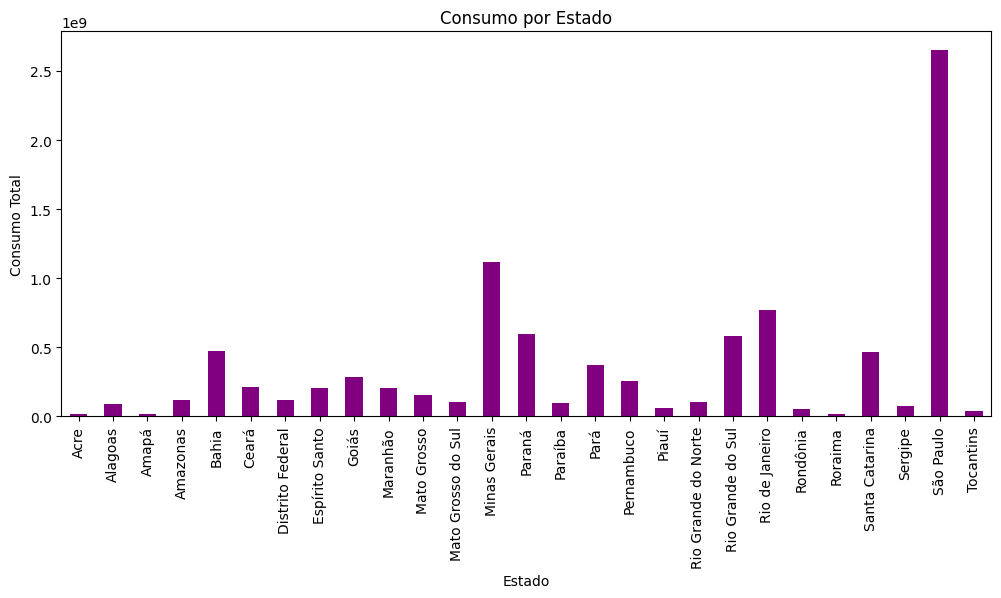

In [21]:
#6. Consumo por estado
df_final.groupby('estado')['consumo'].sum().plot(kind='bar', figsize=(12,5), color='purple')
plt.title('Consumo por Estado')
plt.xlabel('Estado')
plt.ylabel('Consumo Total')
plt.xticks(rotation=90)
plt.show()



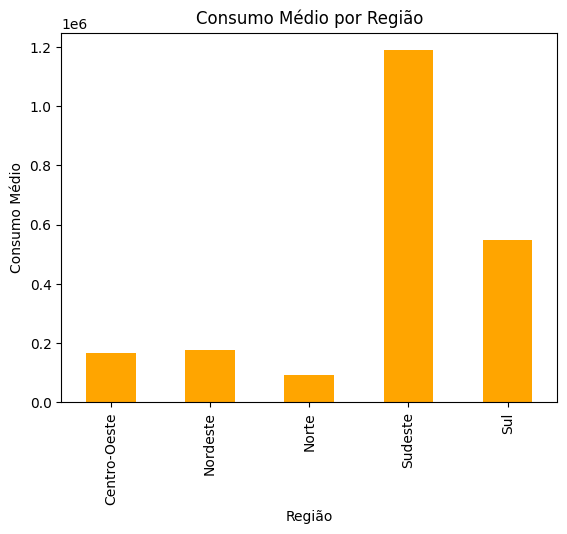

In [22]:
#7. Consumo médio por região
df_final.groupby('regiao')['consumo'].mean().plot(kind='bar', color='orange')
plt.title('Consumo Médio por Região')
plt.xlabel('Região')
plt.ylabel('Consumo Médio')
plt.show()


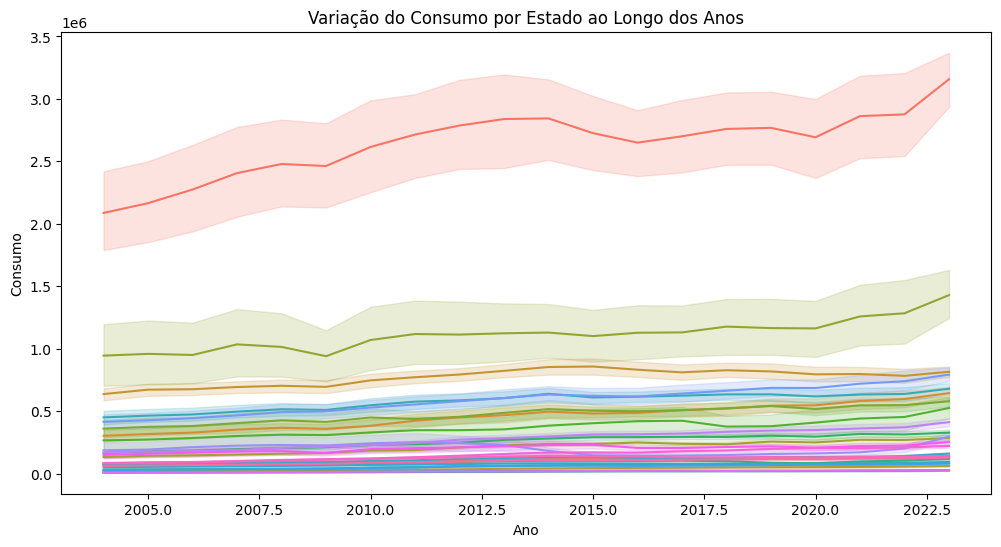

In [24]:
#8. Variação do consumo entre estados ao longo do tempo
import seaborn as sns

plt.figure(figsize=(12,6))
sns.lineplot(data=df_final, x='ano', y='consumo', hue='estado', legend=False)
plt.title('Variação do Consumo por Estado ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Consumo')
plt.show()


In [25]:
#9. Estados com maior e menor consumo
print("Estados com maior consumo:\n", df_final.groupby('estado')['consumo'].sum().nlargest(5))
print("Estados com menor consumo:\n", df_final.groupby('estado')['consumo'].sum().nsmallest(5))


Estados com maior consumo:
 estado
São Paulo            2653887197
Minas Gerais         1119341475
Rio de Janeiro        768732221
Paraná                596487107
Rio Grande do Sul     578813884
Name: consumo, dtype: int64
Estados com menor consumo:
 estado
Roraima      15885708
Acre         17806038
Amapá        19047074
Tocantins    38524745
Rondônia     55632655
Name: consumo, dtype: int64


In [26]:
#10. Impacto do número de consumidores por estado no consumo
df_final.groupby('estado')[['numero_consumidores', 'consumo']].mean().sort_values(by='consumo', ascending=False)


,numero_consumidores,consumo
estado,,
São Paulo,4.322147e+06,2.661873e+06
Minas Gerais,2.070609e+06,1.122710e+06
Rio de Janeiro,1.705510e+06,7.710454e+05
Paraná,1.079147e+06,5.976825e+05
Rio Grande do Sul,1.085538e+06,5.805556e+05
Bahia,1.338370e+06,4.769199e+05
Santa Catarina,6.725156e+05,4.639934e+05
Pará,5.361824e+05,3.723216e+05
Goiás,6.620369e+05,2.834485e+05


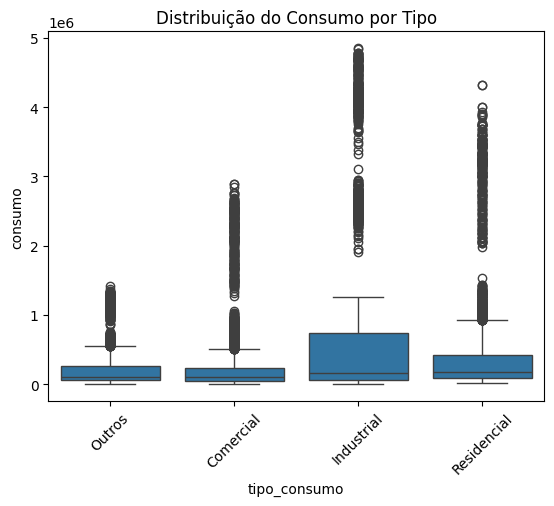

In [27]:
#11. Boxplot do consumo por tipo de consumo
sns.boxplot(data=df_final, x='tipo_consumo', y='consumo')
plt.xticks(rotation=45)
plt.title('Distribuição do Consumo por Tipo')
plt.show()


In [29]:
#12. Outliers no consumo

import numpy as np

Q1 = np.percentile(df_final['consumo'], 25)
Q3 = np.percentile(df_final['consumo'], 75)
IQR = Q3 - Q1

outliers = df_final[(df_final['consumo'] < Q1 - 1.5*IQR) | (df_final['consumo'] > Q3 + 1.5*IQR)]
print(outliers)


        ano  mes sigla_uf tipo_consumo  numero_consumidores  consumo  \
1      2004    1       SP       Outros             311650.0   937538   
42     2004    2       SP       Outros             313264.0   875586   
76     2004    3       SP       Outros             314566.0   964620   
86     2004    4       SP       Outros             314687.0   960806   
129    2004    5       SP       Outros             313490.0   914846   
...     ...  ...      ...          ...                  ...      ...   
26910  2023   12       MG  Residencial            8275770.0  1289617   
26914  2023   12       RJ  Residencial            7102498.0  1147669   
26915  2023   12       PR  Residencial            4351390.0   846141   
26925  2023   12       RS  Residencial            4360128.0   945119   
26931  2023   12       SP  Residencial           19162599.0  4324911   

       id_estado sigla             estado   regiao    pais  
1             25    SP          São Paulo  Sudeste  Brasil  
42           

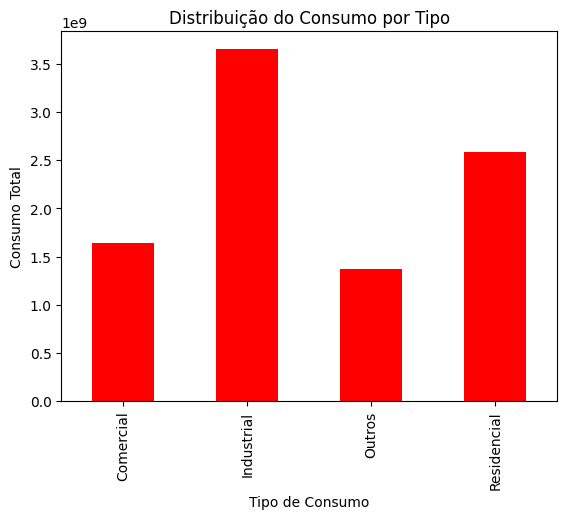

In [30]:
#13. Distribuição do consumo entre diferentes tipos de consumidores

df_final.groupby('tipo_consumo')['consumo'].sum().plot(kind='bar', color='red')
plt.title('Distribuição do Consumo por Tipo')
plt.xlabel('Tipo de Consumo')
plt.ylabel('Consumo Total')
plt.show()


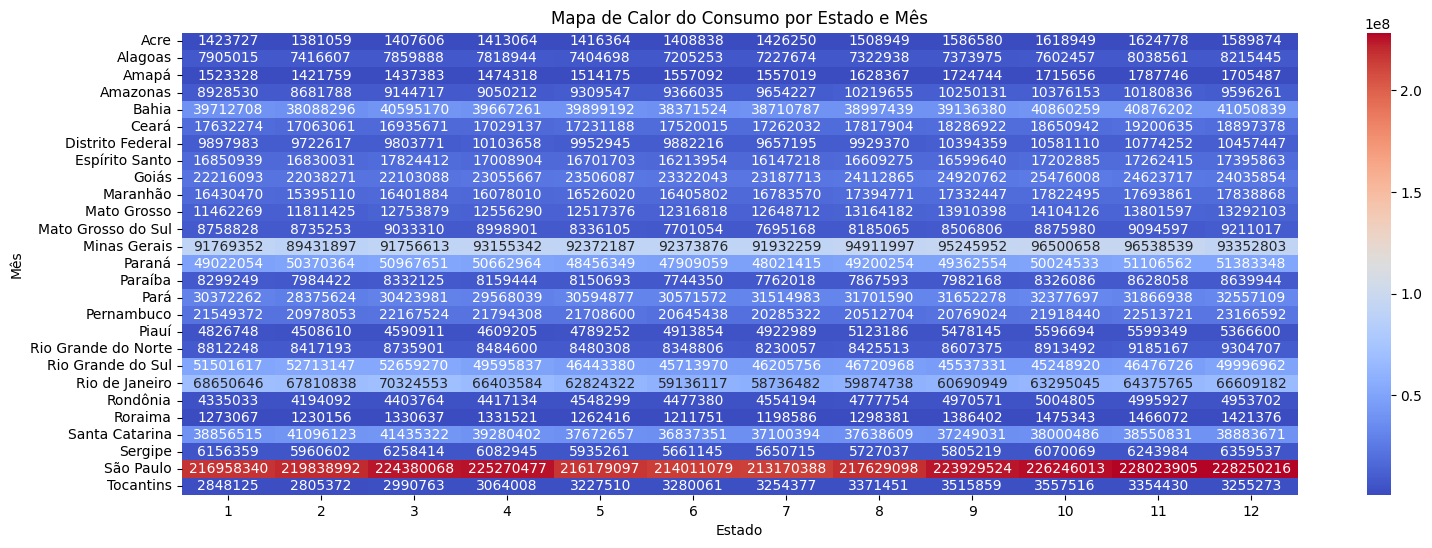

In [36]:
#15. Mapa de calor com consumo por estado e mês
plt.figure(figsize=(18, 6))  # Ajusta o tamanho do gráfico
pivot = df_final.pivot_table(index='estado', columns='mes', values='consumo', aggfunc='sum')
sns.heatmap(pivot, cmap='coolwarm', annot=True, fmt='.0f')

plt.title('Mapa de Calor do Consumo por Estado e Mês')
plt.xlabel('Estado')
plt.ylabel('Mês')
plt.show()
